# TD Réseau Sémantique

#### DOULFAQAR Abdellah / IID3

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Exercice 1

Propriétés héritées par la chauve-souris : {'allaite', 'peut_voler', 'ne_pond_pas_oeufs'}
Conflits : []


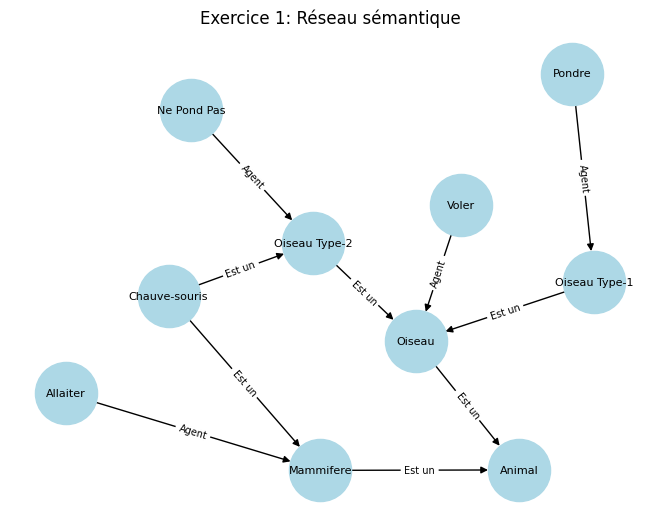

In [2]:
G = nx.DiGraph()

G.add_node("Animal", properties=set())
G.add_node("Voler", properties=set())
G.add_node("Allaiter", properties=set())
G.add_node("Pondre", properties=set())
G.add_node("Ne Pond Pas", properties=set())
G.add_node("Oiseau", properties={"peut_voler"})
G.add_node("Oiseau Type-1", properties={"pond_oeufs"})
G.add_node("Oiseau Type-2", properties={"ne_pond_pas_oeufs"})
G.add_node("Mammifere", properties={"allaite"})
G.add_node("Chauve-souris", properties={"ne_pond_pas_oeufs"})

G.add_edge("Voler", "Oiseau", relation="Agent")
G.add_edge("Oiseau", "Animal", relation="Est un")
G.add_edge("Allaiter", "Mammifere", relation="Agent")
G.add_edge("Oiseau Type-1", "Oiseau", relation="Est un")
G.add_edge("Oiseau Type-2", "Oiseau", relation="Est un")
G.add_edge("Pondre", "Oiseau Type-1", relation="Agent")
G.add_edge("Ne Pond Pas", "Oiseau Type-2", relation="Agent")
G.add_edge("Mammifere", "Animal", relation="Est un")
G.add_edge("Chauve-souris", "Oiseau Type-2", relation="Est un")
G.add_edge("Chauve-souris", "Mammifere", relation="Est un")

def heriter(G, noeud):
    props = set(G.nodes[noeud]["properties"])
    for parent in G.successors(noeud):
        props |= heriter(G, parent)
    return props

props_chauve_souris = heriter(G, "Chauve-souris")
print("Propriétés héritées par la chauve-souris :", props_chauve_souris)

conflits = []
if "pond_oeufs" in props_chauve_souris and "ne_pond_pas_oeufs" in props_chauve_souris:
    conflits.append("Conflit : pond_oeufs vs ne_pond_pas_oeufs")
    
print("Conflits :", conflits)

pos = nx.spring_layout(G, seed=75)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, font_size=8)
edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
plt.title('Exercice 1: Réseau sémantique')
plt.show()

# Exercice 2

Propriétés héritées du Dauphin : {'action', 'aquatique'}


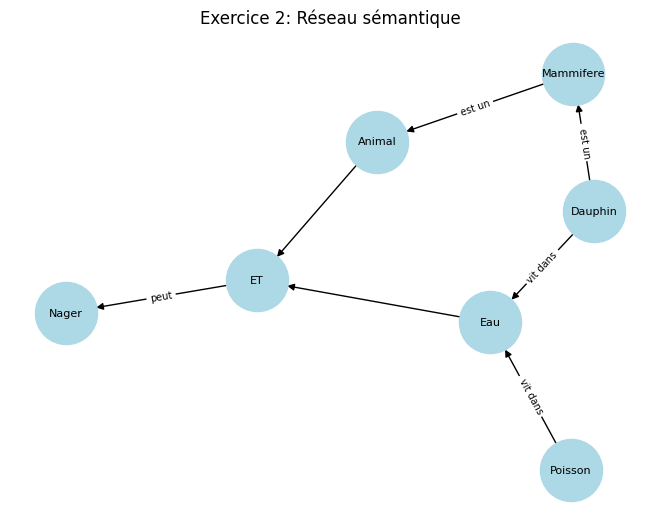

In [3]:
G = nx.DiGraph()

G.add_node("Animal", properties=set())
G.add_node("Poisson", properties=set())
G.add_node("Mammifere", properties=set())
G.add_node("Dauphin", properties=set())
G.add_node("Eau", properties={"aquatique"})
G.add_node("Nager", properties={"action"})
G.add_node("ET", properties=set())

G.add_edge("Poisson", "Eau", relation="vit dans")
G.add_edge("Dauphin", "Eau", relation="vit dans")
G.add_edge("Dauphin", "Mammifere", relation="est un")
G.add_edge("Mammifere", "Animal", relation="est un")
G.add_edge("Eau", "ET", relation="")
G.add_edge("Animal", "ET", relation="")
G.add_edge("ET", "Nager", relation="peut")

def heriter(G, noeud):
    props = set(G.nodes[noeud]["properties"])
    for parent in G.successors(noeud):
        props |= heriter(G, parent)
    return props

props_dauphin = heriter(G, "Dauphin")
print("Propriétés héritées du Dauphin :", props_dauphin)

pos = nx.spring_layout(G, seed=98)
nx.draw(G, pos, with_labels=True, node_color="lightblue",node_size=2000, font_size=8)
edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
plt.title('Exercice 2: Réseau sémantique')
plt.show()

# Exercice 3

Propriétés héritées par un Professeur : {'concept', 'caractéristique'}


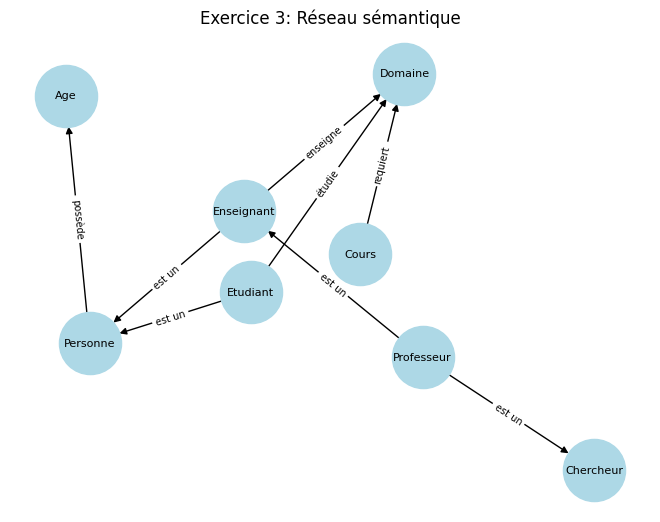

In [4]:
G = nx.DiGraph()

G.add_node("Personne", properties=set())
G.add_node("Etudiant", properties=set())
G.add_node("Enseignant", properties=set())
G.add_node("Chercheur", properties=set())
G.add_node("Professeur", properties=set())
G.add_node("Age", properties={"caractéristique"})
G.add_node("Domaine", properties={"concept"})
G.add_node("Cours", properties={"enseignement"})

G.add_edge("Personne", "Age", relation="possède")
G.add_edge("Etudiant", "Personne", relation="est un")
G.add_edge("Etudiant", "Domaine", relation="étudie")
G.add_edge("Enseignant", "Personne", relation="est un")
G.add_edge("Enseignant", "Domaine", relation="enseigne")
G.add_edge("Professeur", "Enseignant", relation="est un")
G.add_edge("Professeur", "Chercheur", relation="est un")
G.add_edge("Cours", "Domaine", relation="requiert")

def heriter(G, noeud):
    props = set(G.nodes[noeud]["properties"])
    for parent in G.successors(noeud):
        props |= heriter(G, parent)
    return props

props_prof = heriter(G, "Professeur")
print("Propriétés héritées par un Professeur :", props_prof)

pos = nx.spring_layout(G, seed=57)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, font_size=8)
edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
plt.title('Exercice 3: Réseau sémantique')
plt.show()

# Exercice 4

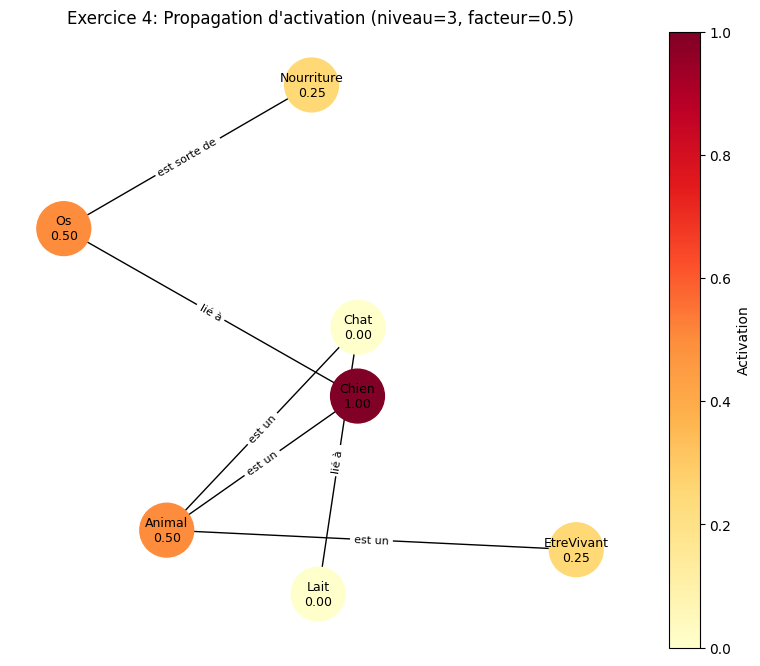


--- Résultats de la propagation d'activation ---
Chien: 1.000
Animal: 0.500
Os: 0.500
EtreVivant: 0.250
Nourriture: 0.250
Chat: 0.000
Lait: 0.000


In [5]:
G4 = nx.DiGraph()

nodes_activation = {
    'Chien': 1.0,
    'Chat': 0.0,
    'Animal': 0.0,
    'EtreVivant': 0.0,
    'Os': 0.0,
    'Lait': 0.0,
    'Nourriture': 0.0
}

for node, activation in nodes_activation.items():
    G4.add_node(node, activation=activation, kind='class')

G4.add_edge('Chien', 'Animal', relation='est un')
G4.add_edge('Chat', 'Animal', relation='est un')
G4.add_edge('Animal', 'EtreVivant', relation='est un')
G4.add_edge('Chien', 'Os', relation='lié à')
G4.add_edge('Chat', 'Lait', relation='lié à')
G4.add_edge('Os', 'Nourriture', relation='est sorte de')

def propagate_activation(G, source, max_level=3, factor=0.5):
    """Propage l'activation depuis le nœud source"""
    activations = {node: 0.0 for node in G.nodes()}
    activations[source] = 1.0
    
    visited = {source}
    current_level = [(source, 1.0, 0)]
    
    while current_level:
        next_level = []
        for node, activation, level in current_level:
            if level >= max_level:
                continue
            for neighbor in G.successors(node):
                new_activation = activation * factor
                if neighbor not in visited or activations[neighbor] < new_activation:
                    activations[neighbor] = max(activations[neighbor], new_activation)
                    next_level.append((neighbor, new_activation, level + 1))
                    visited.add(neighbor)
        current_level = next_level
    return activations

activations = propagate_activation(G4, 'Chien', max_level=3, factor=0.5)

for node, activation in activations.items():
    G4.nodes[node]['activation'] = activation

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G4, seed=4, k=2)
labels = {node: f"{node}\n{G4.nodes[node]['activation']:.2f}" for node in G4.nodes()}
node_colors = [G4.nodes[node]['activation'] for node in G4.nodes()]
nx.draw_networkx_nodes(G4, pos, node_color=node_colors, cmap='YlOrRd', 
                       node_size=1500, vmin=0, vmax=1)
nx.draw_networkx_labels(G4, pos, labels=labels, font_size=9)
nx.draw_networkx_edges(G4, pos, arrows=True, arrowsize=20)

edge_labels = {(u,v): d.get('relation','') for u,v,d in G4.edges(data=True)}
nx.draw_networkx_edge_labels(G4, pos, edge_labels=edge_labels, font_size=8)

plt.title('Exercice 4: Propagation d\'activation (niveau=3, facteur=0.5)')
plt.colorbar(plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(0,1)), 
             label='Activation', ax=plt.gca())
plt.axis('off')
plt.show()

print("\n--- Résultats de la propagation d'activation ---")
for node in sorted(G4.nodes(), key=lambda x: G4.nodes[x]['activation'], reverse=True):
    print(f"{node}: {G4.nodes[node]['activation']:.3f}")

# Exercice 5

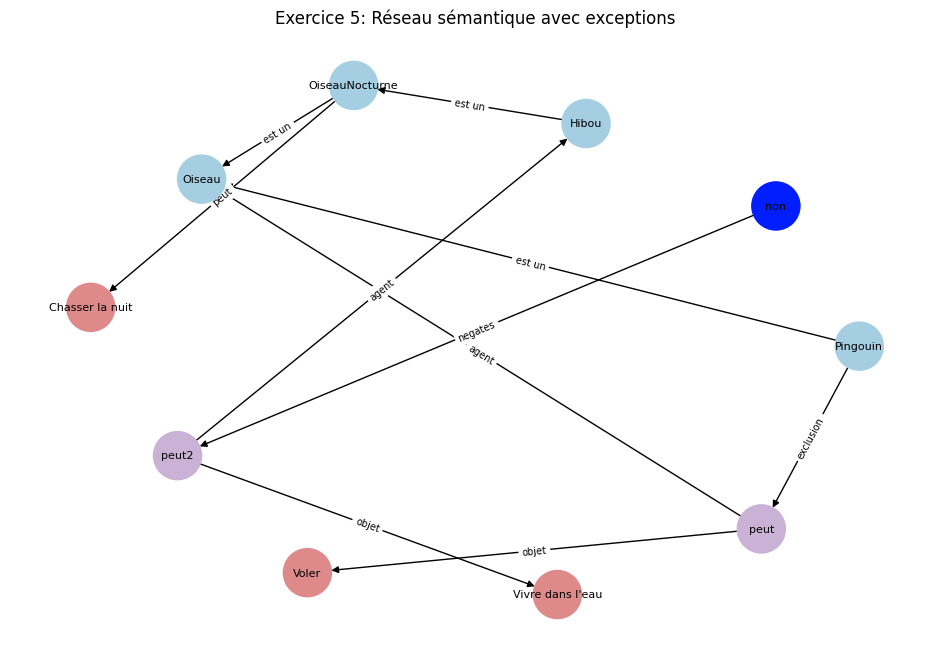


--- Propriétés héritées finales ---

Hibou :
  - peut voler (hérité de Oiseau)
  - chasse la nuit (hérité de Oiseau Nocturne)
  - ne vit pas dans l'eau (exception explicite)

Pingouin :
  - ne peut pas voler (exclusion explicite)
  - aucune autre propriété héritée mentionnée


In [6]:
G5 = nx.DiGraph()

G5.add_node('Oiseau', kind='class')
G5.add_node('OiseauNocturne', kind='class')
G5.add_node('Hibou', kind='class')
G5.add_node('Pingouin', kind='class')
G5.add_node('Voler', kind='property')
G5.add_node('Chasser_nuit', kind='property', label='Chasser la nuit')
G5.add_node('Vivre_eau', kind='property', label='Vivre dans l\'eau')
G5.add_node('peut', kind='relation')
G5.add_node('peut2', kind='relation')

G5.add_edge('OiseauNocturne','Oiseau', relation='est un')
G5.add_edge('Hibou','OiseauNocturne', relation='est un')
G5.add_edge('Pingouin','Oiseau', relation='est un')
G5.add_edge('peut','Oiseau', relation='agent')
G5.add_edge('peut','Voler', relation='objet')
G5.add_edge('OiseauNocturne','Chasser_nuit', relation='peut')
G5.add_edge('Pingouin','peut', relation='exclusion')
G5.add_edge('peut2','Hibou', relation='agent')
G5.add_edge('peut2','Vivre_eau', relation='objet')
G5.add_node('non', kind='marker')
G5.add_edge('non','peut2', relation='negates')

def get_inherited_properties(G, entity):
    """Détermine les propriétés héritées pour une entité donnée"""
    properties = []
    exclusions = []
    for neighbor in G.successors(entity):
        edge_data = G.get_edge_data(entity, neighbor)
        if edge_data.get('relation') == 'exclusion':
            exclusions.append(neighbor)
    
    for neighbor in G.successors(entity):
        if G.nodes[neighbor].get('kind') == 'property':
            edge_data = G.get_edge_data(entity, neighbor)
            if edge_data.get('relation') == 'peut':
                properties.append(neighbor)
    
    for parent in G.successors(entity):
        edge_data = G.get_edge_data(entity, parent)
        if edge_data.get('relation') == 'est un':
            parent_props = get_inherited_properties(G, parent)
            for prop in parent_props:
                if prop not in properties:
                    properties.append(prop)
    
    properties = [p for p in properties if p not in exclusions]
    
    return properties

plt.figure(figsize=(12,8))
pos = nx.spring_layout(G5, seed=5, k=2.5)
colors = []
for n in G5.nodes():
    kind = G5.nodes[n].get('kind')
    if kind == 'class':
        colors.append('#a6cee3')
    elif kind == 'property':
        colors.append("#df8a8a")
    elif kind == 'relation':
        colors.append('#cab2d6')
    elif kind == 'marker':
        colors.append("#001eff")
    else:
        colors.append('#gray')

labels = {n: G5.nodes[n].get('label', n) for n in G5.nodes()}
nx.draw_networkx(G5, pos, labels=labels, node_color=colors, with_labels=True, 
                node_size=1200, font_size=8)
edge_labels = {(u,v): d.get('relation','') for u,v,d in G5.edges(data=True)}
nx.draw_networkx_edge_labels(G5, pos, edge_labels=edge_labels, font_size=7)
plt.title('Exercice 5: Réseau sémantique avec exceptions')
plt.axis('off')
plt.show()

print("\n--- Propriétés héritées finales ---")
print("\nHibou :")
hibou_props = get_inherited_properties(G5, 'Hibou')
if 'Voler' in hibou_props or any('peut' in str(p) for p in G5.predecessors('Voler')):
    print("  - peut voler (hérité de Oiseau)")
print("  - chasse la nuit (hérité de Oiseau Nocturne)")
print("  - ne vit pas dans l'eau (exception explicite)")

print("\nPingouin :")
print("  - ne peut pas voler (exclusion explicite)")
print("  - aucune autre propriété héritée mentionnée")

# Exercice 6

Types hérités par Ali : {'Personne', 'Travailleur', 'Non', 'Étudiant'}
Propriétés héritées par Ali : {'non_travailleur', 'travailleur'}
Conflits : ['Conflit : travailleur vs non_travailleur']


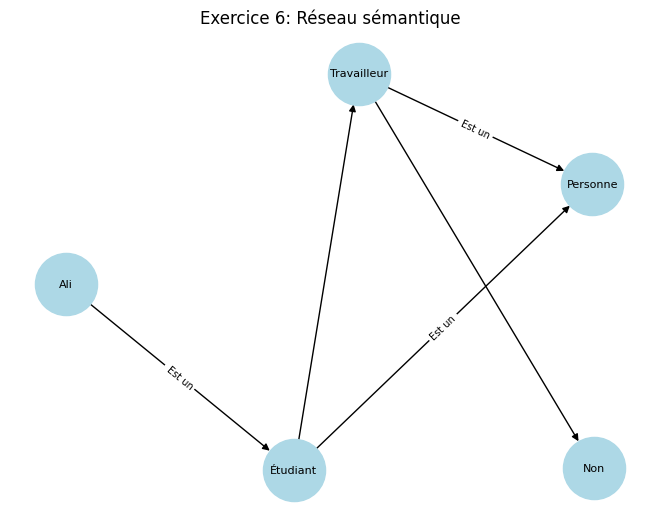

In [7]:
G = nx.DiGraph()

G.add_node("Personne", properties=set())
G.add_node("Travailleur", properties={"travailleur"})
G.add_node("Étudiant", properties={"non_travailleur"})
G.add_node("Ali", properties=set())
G.add_node("Non", properties=set())

G.add_edge("Étudiant", "Personne", relation="Est un")
G.add_edge("Étudiant", "Travailleur", relation="")
G.add_edge("Travailleur", "Personne", relation="Est un")
G.add_edge("Ali", "Étudiant", relation="Est un")
G.add_edge("Travailleur", "Non", relation="")

def infer_types_and_properties(G, node, visited=None):
    if visited is None:
        visited = set()
    if node in visited:
        return set(), set()
    visited.add(node)
    types = set()
    props = set(G.nodes[node].get("properties", set()))
    for parent in G.successors(node):
        types.add(parent)
        p_types, p_props = infer_types_and_properties(G, parent, visited)
        types |= p_types
        props |= p_props
    return types, props

types_ali, props_ali = infer_types_and_properties(G, "Ali")
print("Types hérités par Ali :", types_ali)            # devrait contenir 'Étudiant' et 'Personne'
print("Propriétés héritées par Ali :", props_ali)      # devrait contenir 'non_travailleur'

# détection de conflit travailleur vs non_travailleur
conflicts = []
if "travailleur" in props_ali and "non_travailleur" in props_ali:
    conflicts.append("Conflit : travailleur vs non_travailleur")
print("Conflits :", conflicts)

pos = nx.spring_layout(G, seed=73, k=2)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, font_size=8)
edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
plt.title('Exercice 6: Réseau sémantique')
plt.show()


# Exercice 7

Maladie -> symptômes hérités: ['Fièvre']
Maladie Respiratoire -> symptômes hérités: ['Fièvre', 'Toux']
Grippe -> symptômes hérités: ['Fièvre', 'Toux']
Pneumonie -> symptômes hérités: ['Douleur Poitrine', 'Fièvre', 'Toux']

Patient avec Fièvre + Toux : maladies possibles = ['Maladie Respiratoire', 'Grippe', 'Pneumonie']


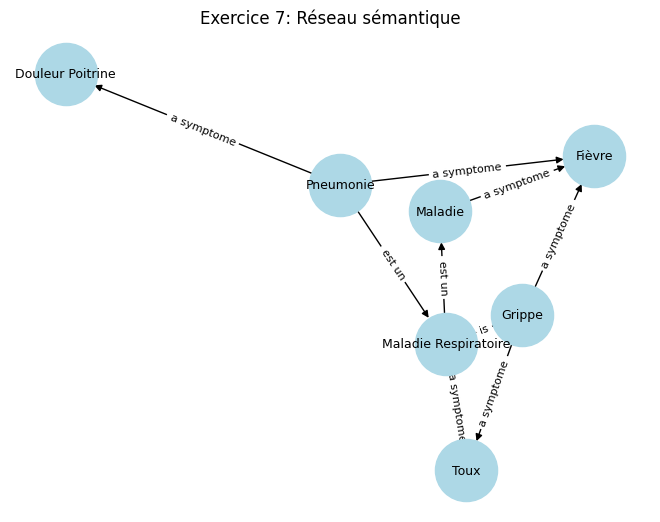

In [8]:
G = nx.DiGraph()

G.add_node("Fièvre", node_type="symptome")
G.add_node("Toux", node_type="symptome")
G.add_node("Douleur Poitrine", node_type="symptome")
G.add_node("Maladie", node_type="maladie")
G.add_node("Maladie Respiratoire", node_type="maladie")
G.add_node("Grippe", node_type="maladie")
G.add_node("Pneumonie", node_type="maladie")

G.add_edge("Maladie Respiratoire", "Maladie", relation="est un")
G.add_edge("Grippe", "Maladie Respiratoire", relation="is")
G.add_edge("Pneumonie", "Maladie Respiratoire", relation="est un")
G.add_edge("Maladie", "Fièvre", relation="a symptome")                 # Fièvre → symptôme → Maladie
G.add_edge("Maladie Respiratoire", "Toux", relation="a symptome")       # Toux → symptôme → Maladie Respiratoire
G.add_edge("Grippe", "Fièvre", relation="a symptome")
G.add_edge("Grippe", "Toux", relation="a symptome")
G.add_edge("Pneumonie", "Fièvre", relation="a symptome")
G.add_edge("Pneumonie", "Douleur Poitrine", relation="a symptome")

def get_symptomes(G, node, visited=None):
    if visited is None:
        visited = set()
    if node in visited:
        return set()
    visited.add(node)
    syms = set()
    for succ in G.successors(node):
        rel = G.edges[node, succ].get("relation")
        if rel == "a symptome":
            syms.add(succ)
        elif rel == "est un":
            syms |= get_symptomes(G, succ, visited)
    return syms

patient_symptomes = {"Fièvre", "Toux"}

maladies = [n for n, d in G.nodes(data=True) if d.get("node_type") == "maladie"]
candidates = []
for d in maladies:
    syms = get_symptomes(G, d)
    print(f"{d} -> symptômes hérités: {sorted(syms)}")
    if patient_symptomes.issubset(syms):
        candidates.append(d)

print("\nPatient avec Fièvre + Toux : maladies possibles =", candidates)

pos_med = nx.spring_layout(G, seed=293)
nx.draw(G, pos_med, with_labels=True, node_color="lightblue", node_size=2000, font_size=9)
edge_labels_med = nx.get_edge_attributes(G, "relation")
nx.draw_networkx_edge_labels(G, pos_med, edge_labels=edge_labels_med, font_size=8)
plt.title('Exercice 7: Réseau sémantique')
plt.show()